#ステップサイズの調整
ステップサイズ 𝛼 を固定せず、各ステップで異なる値 $𝛼_𝑛(𝑎)$を使用することもできます。

- サンプル平均法
$$
\alpha_n(a)=\frac{1}{n}
$$
​
    選択回数 𝑛 に反比例するステップサイズ。
    長期的に推定値が真の値に収束することが大数の法則により保証されます。
- 定数ステップサイズ

$$𝛼_𝑛(𝑎)=α $$
    一定のステップサイズ。
    重みは常に直近の報酬に大きく与えられるため、推定値は完全には収束せず、非定常環境への適応が可能。

In [15]:
!pip install tqdm

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import tqdm

class NonstationaryBandit:
    def __init__(self,k,std_dev=0.01):
        self.k = k 
        self.q_true = np.zeros(k)
        self.std_dev = std_dev

    def step(self,action):
        reward = np.random.normal(self.q_true[action],1)
        self.q_true += np.random.normal(0,self.std_dev,self.k)
        return reward
    
def run_bandit_testbed(method,steps,runs,epsilon,alpha=None):
    k = 10
    rewards = np.zeros((runs,steps))
    optimal_action_counts = np.zeros((runs,steps))

    for run in tqdm.tqdm(range(runs)):
        bandit = NonstationaryBandit(k)
        Q = np.zeros(k)
        N = np.zeros(k)

        for t in range(steps):
            if np.random.rand() < epsilon:
                action = np.random.randint(k)
            else:
                action = np.argmax(Q)

            reward = bandit.step(action)

            optimal_action = np.argmax(bandit.q_true)
            if action == optimal_action:
                optimal_action_counts[run,t]=1

            if method == "sample_average":
                N[action] += 1
                Q[action] += (1/N[action])*(reward-Q[action])
            elif method == "constant_step":
                Q[action] += alpha * (reward - Q[action])

            rewards[run,t] = reward
    return rewards,optimal_action_counts


In [20]:
# 実験設定
steps = 5000
runs = 1000
epsilon = 0.1
alpha = 0.1


# サンプル平均法
rewards_sample, optimal_sample = run_bandit_testbed("sample_average", steps, runs, epsilon)

# 定数ステップサイズ法
rewards_constant, optimal_constant = run_bandit_testbed("constant_step", steps, runs, epsilon, alpha)

# 平均報酬と最適行動選択率の計算
avg_rewards_sample = np.mean(rewards_sample, axis=0)
avg_optimal_sample = np.mean(optimal_sample, axis=0)

avg_rewards_constant = np.mean(rewards_constant, axis=0)
avg_optimal_constant = np.mean(optimal_constant, axis=0)

100%|██████████| 1000/1000 [00:45<00:00, 21.79it/s]


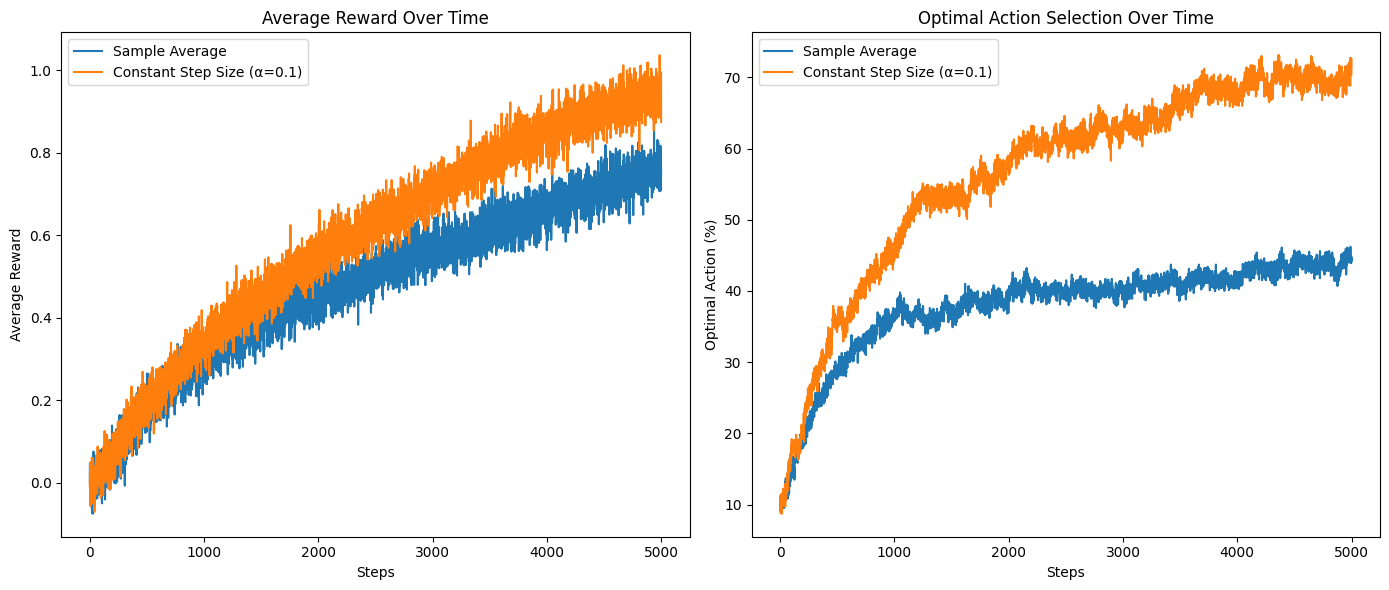

In [21]:
# 結果のプロット
plt.figure(figsize=(14, 6))

# 平均報酬
plt.subplot(1, 2, 1)
plt.plot(avg_rewards_sample, label="Sample Average")
plt.plot(avg_rewards_constant, label="Constant Step Size (α=0.1)")
plt.xlabel("Steps")
plt.ylabel("Average Reward")
plt.title("Average Reward Over Time")
plt.legend()

# 最適行動選択率
plt.subplot(1, 2, 2)
plt.plot(avg_optimal_sample * 100, label="Sample Average")
plt.plot(avg_optimal_constant * 100, label="Constant Step Size (α=0.1)")
plt.xlabel("Steps")
plt.ylabel("Optimal Action (%)")
plt.title("Optimal Action Selection Over Time")
plt.legend()

plt.tight_layout()
plt.show()